Stress the importance of noise
- gaussian noise
- uniform noise
- cauchy noise
- linear noise <br>
https://en.wikipedia.org/wiki/Noise_(signal_processing)

## Why noise in pattern recognition
By a simple defination, noise is the amount of meaningless information contained in corrupted data or noisy data. It incorporates any type of data that  a user system cannot understand or interpret correctly.
Noisy data is that data which is corrupted or distorded or having a very low Signal to noise ratio. Using improper procedures to getting rid of noise in the data can lead to inaccurate results and false conlusions. Noise reduction in noisy data is very important in order to  obtain accurate results. 

There are many different types of noise which includes: 
- gaussian noise
- uniform noise 
- cauchy noise

We are going to implement the gaussian type since it is normally distributed and hence easier to implement.

The gaussian distribution is given by:
$$
     \
X \sim \mathcal{N}(\mu,\,\sigma^{2})\, \mbox { where  $\mu$ is the mean and $\sigma^{2}$ the variance of the distribution.}\\
    \ 
$$
 


In [23]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
%matplotlib inline

In [24]:
# Parameters
L = 10  # Lenght of the edge of the image
N = L**2 # Number of spins 
p = 10 # Number of patterns
MF = 0 # Use or not the Mean Field strategy: if MF=1 uses MF, if MF = 0 only spins at
# a distance R interacts
R = 3 # The 3-nearest neighbor interacts
np.random.seed(1234) # Seed to make the random process reproducible


Original pattern


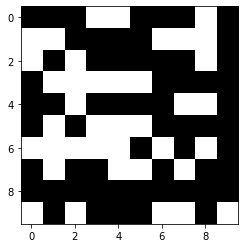

In [25]:
def normal_patterns(N,p):
    global xi
    xi = np.random.randint(0,2,N*p).reshape(p,N)
    xi[xi==0] = -1
    return xi
xi = normal_patterns(N,p)
idx = np.random.randint(0,p)
print('Original pattern')
plt.imshow(xi[idx].reshape(L,L),cmap='Greys')

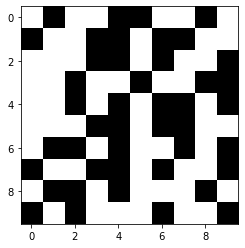

In [26]:
#creating corrupted random data thus corrupting xi
def corrupted_patterns(N, p):
    global yi
    yi = np.random.randint(0,2, N*p).reshape(p, N)
    yi[yi == 0] = -1
    for i in range(p):
        i = np.random.randint(p)
        for j in range(N):
            j = np.random.randint(N)
            if yi[i][j] == xi[i][j]:
                yi[i][j] = -xi[i][j]
            else:
                yi[i][j] = xi[i][j] 
    return yi
yi = corrupted_patterns(N,p)
idy = np.random.randint(0,p)
plt.imshow(yi[idy].reshape(L,L),cmap='Greys')

In [19]:
J = np.zeros((L*L, L*L))
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        w = 0.0  
        for n in range(p):
             w += yi[n, i] * yi[n, j]
        J[i, j] = w / N
        J[i, i] = 0.0
        J[j, i] = J[i, j]  

In [20]:
#updating corrupted patterns
import time as t
global t
t = t.time()
def recovery(N, p):
    h = np.zeros(N) 
    iterations = np.random.randint(N)
    distance = np.zeros((iterations,p)) 
    for iteration in range(iterations):
        for x in range(p):
            for j in range(N):
                j = np.random.randint(N)
                h[j] = 0
                for i in range(N):
                    h[j] += J[i, j]*yi[x][i]
                yi[x] = np.where(h<0, -1, 1)
            for i in range(p):
                distance[iteration,i] = ((p - yi[x])[j]!=0).sum()   
            fig, ax = plt.subplots()
            ax.matshow(yi[x].reshape((L, L)), cmap='Greys')


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


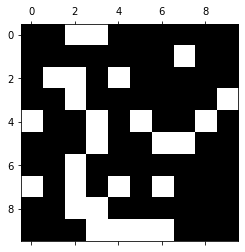

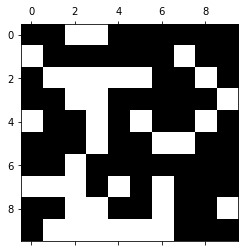

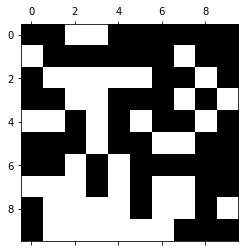

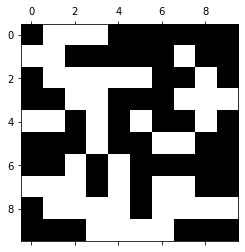

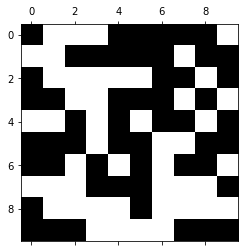

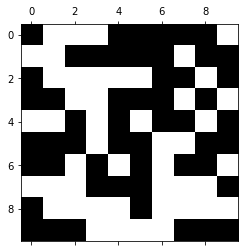

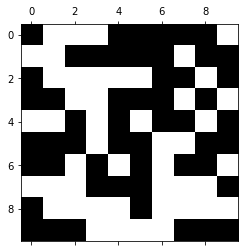

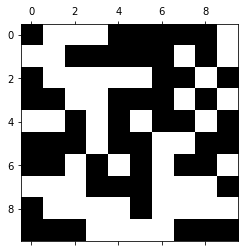

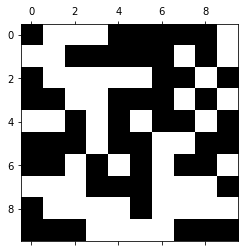

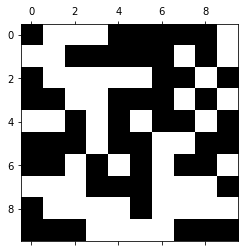

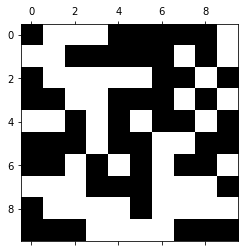

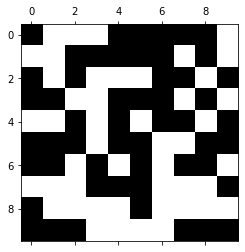

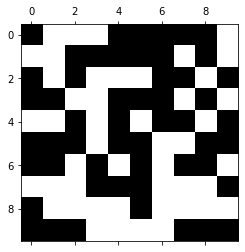

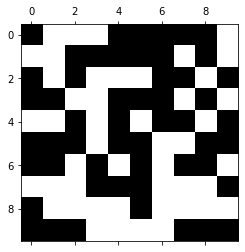

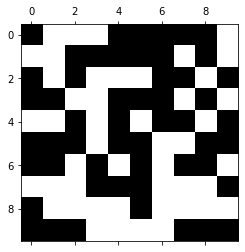

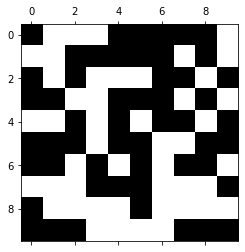

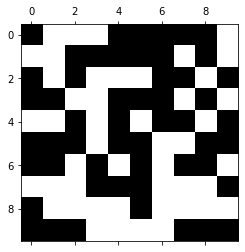

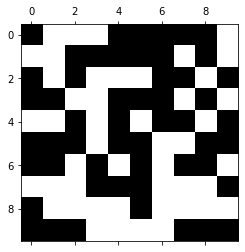

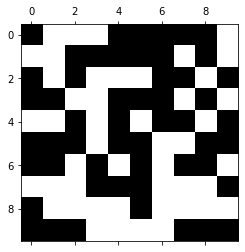

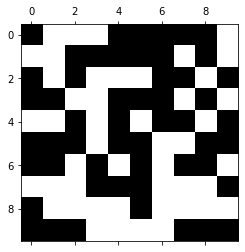

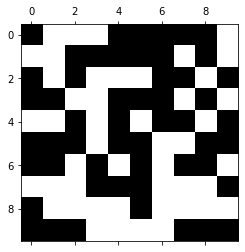

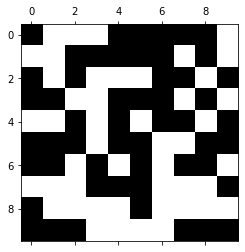

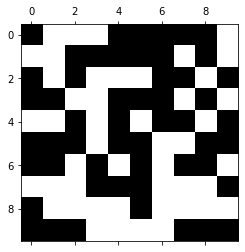

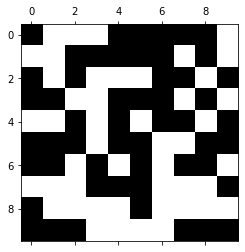

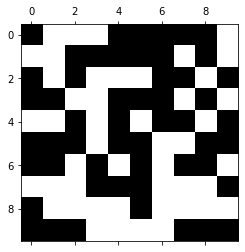

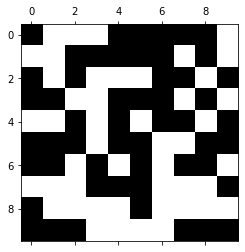

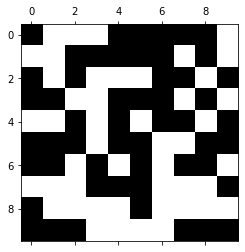

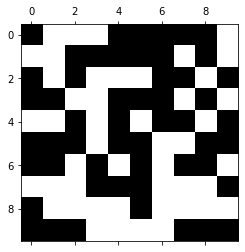

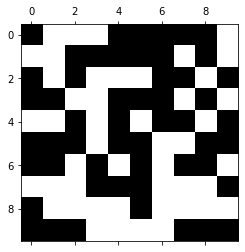

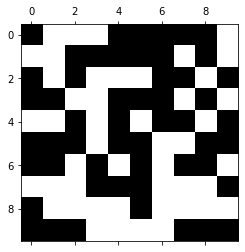

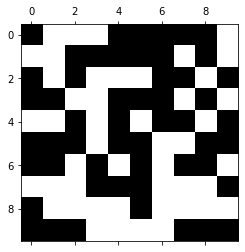

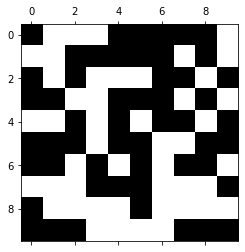

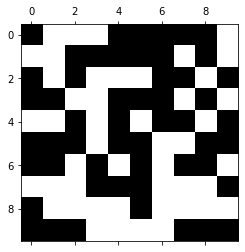

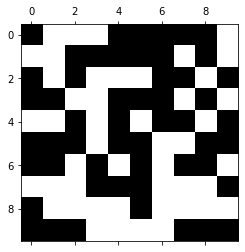

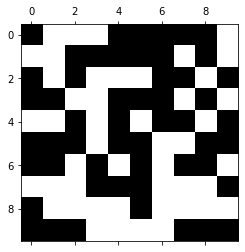

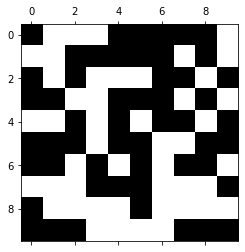

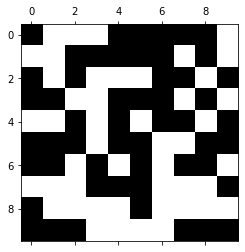

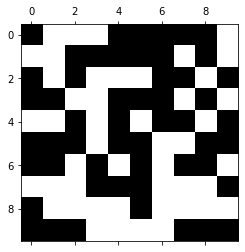

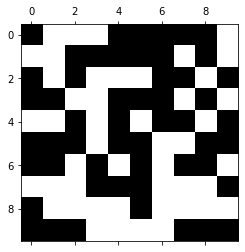

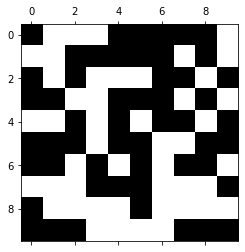

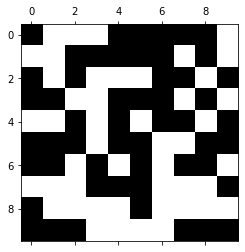

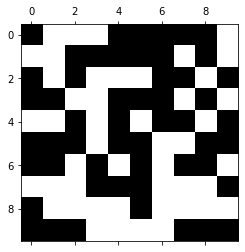

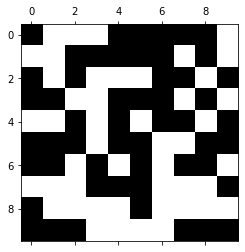

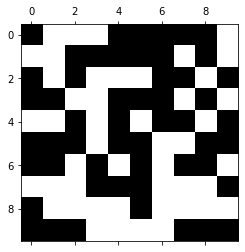

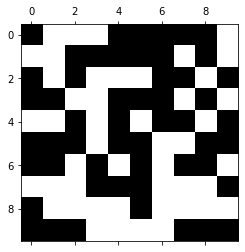

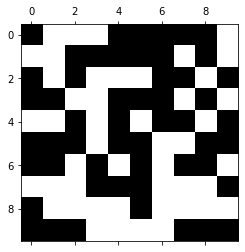

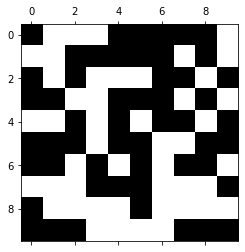

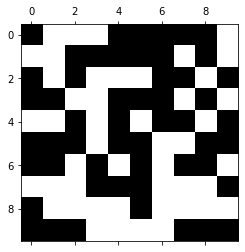

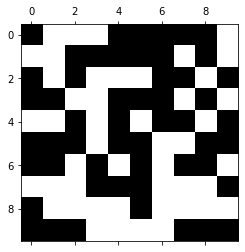

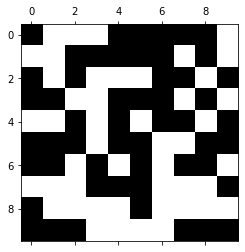

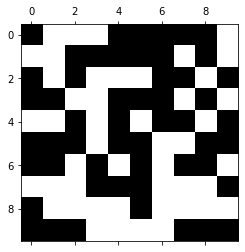

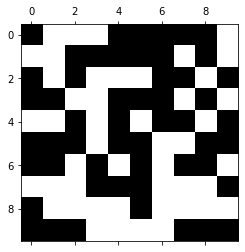

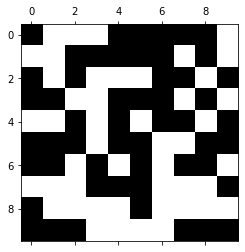

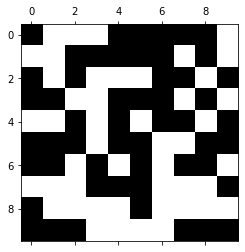

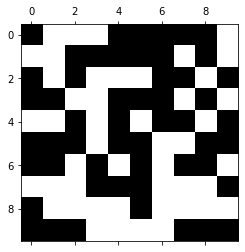

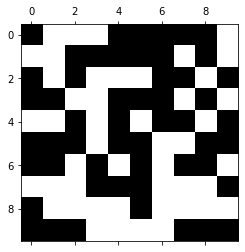

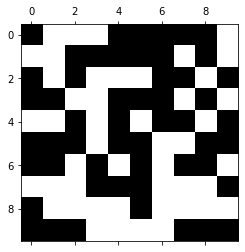

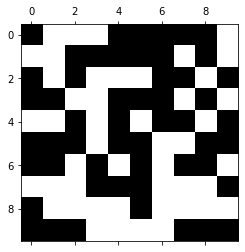

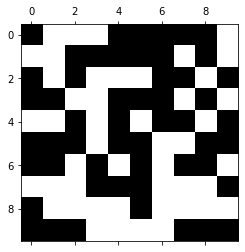

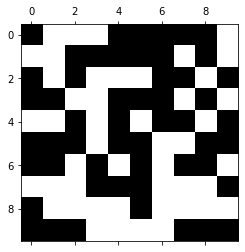

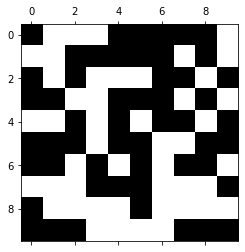

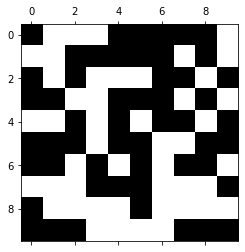

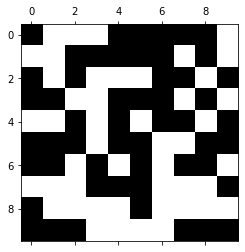

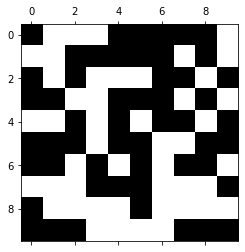

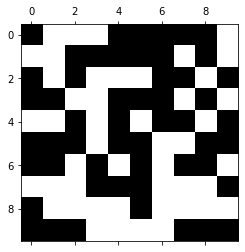

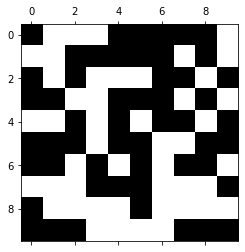

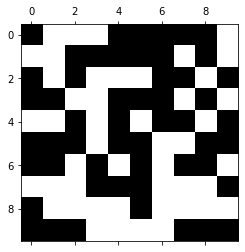

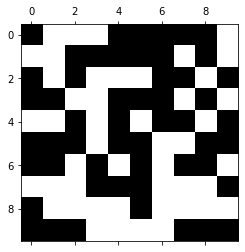

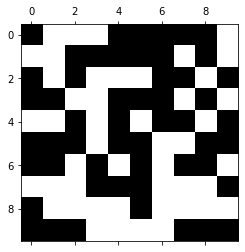

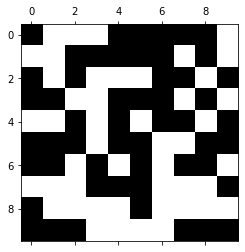

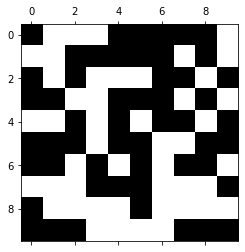

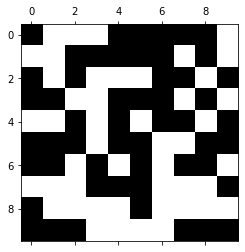

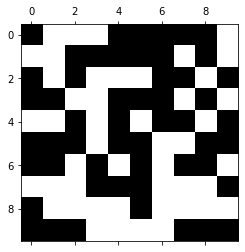

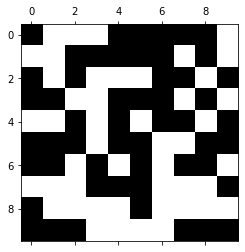

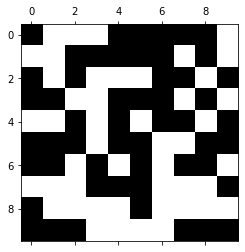

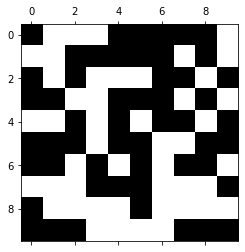

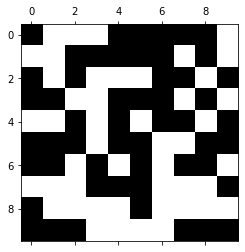

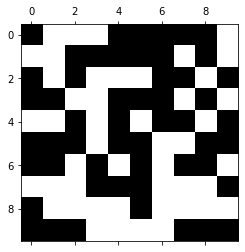

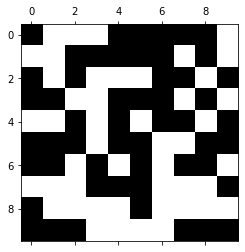

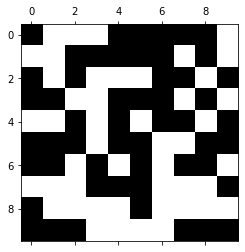

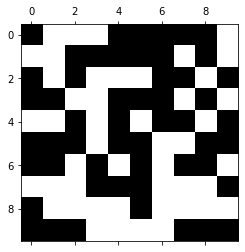

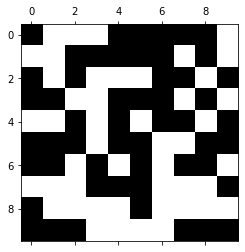

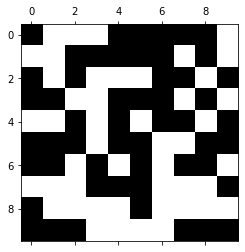

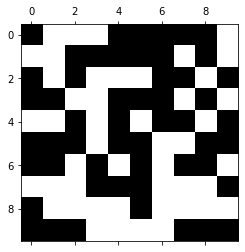

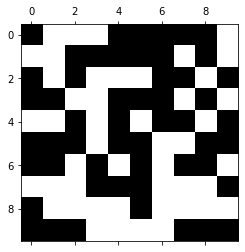

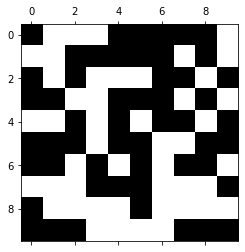

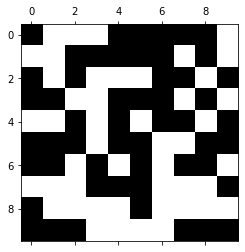

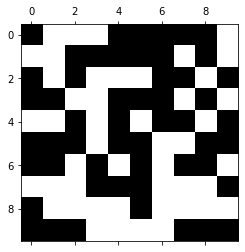

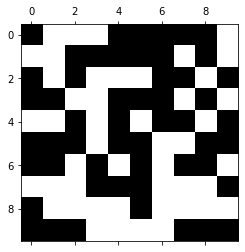

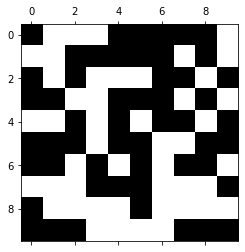

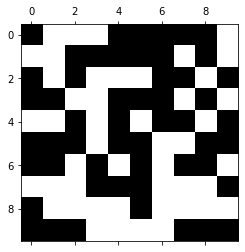

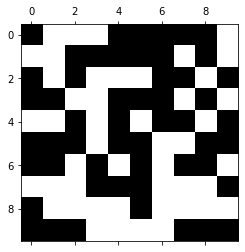

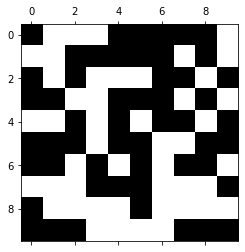

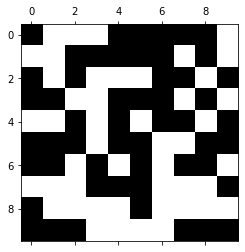

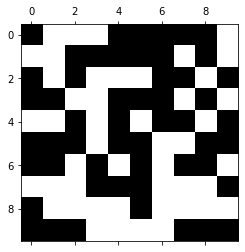

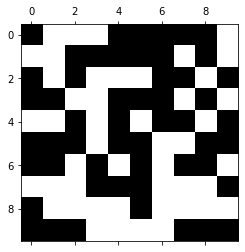

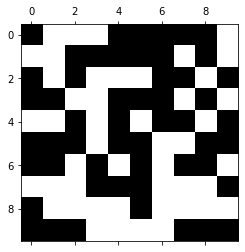

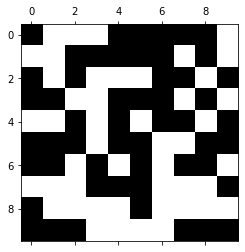

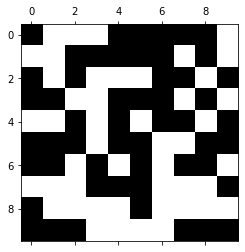

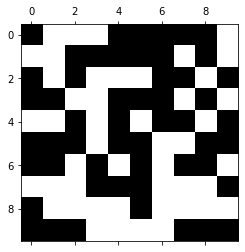

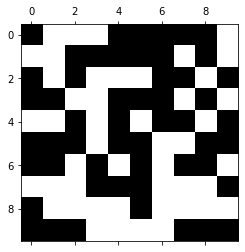

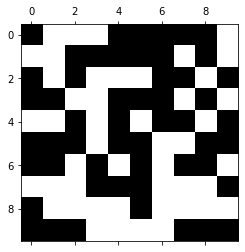

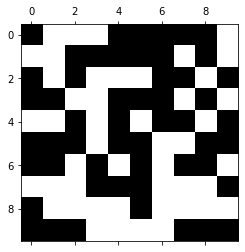

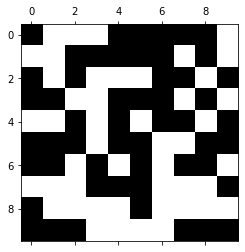

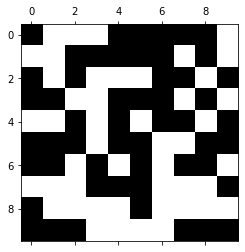

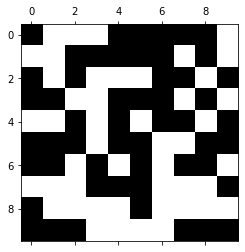

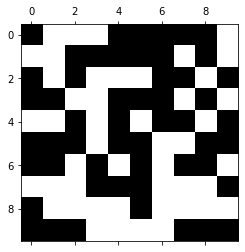

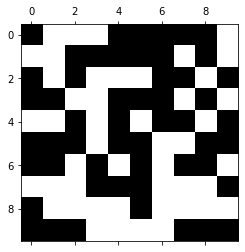

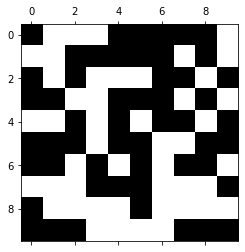

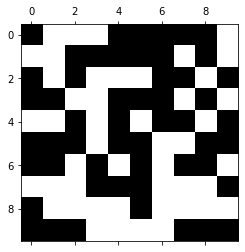

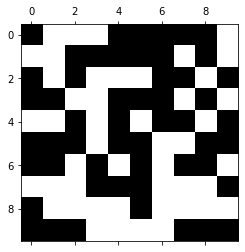

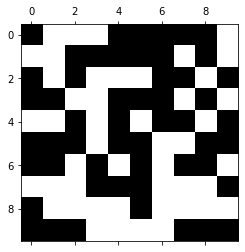

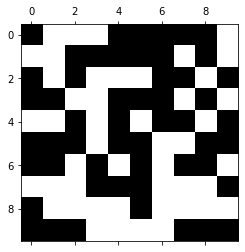

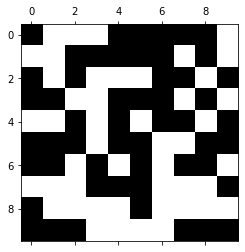

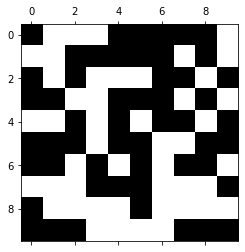

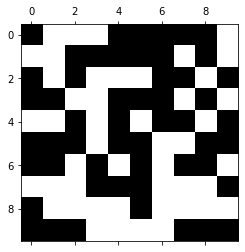

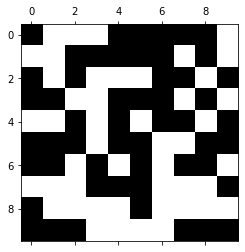

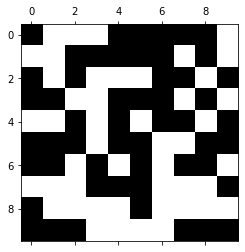

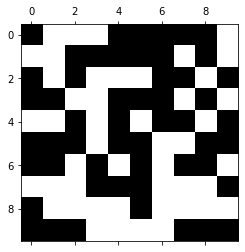

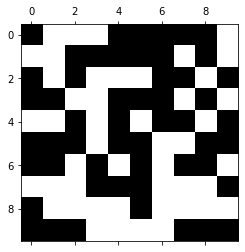

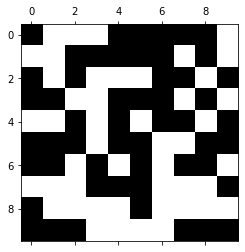

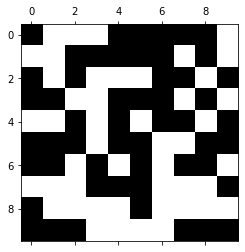

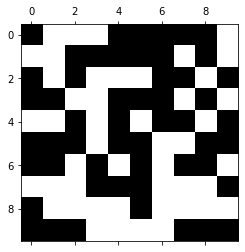

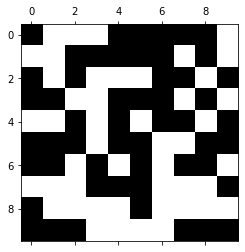

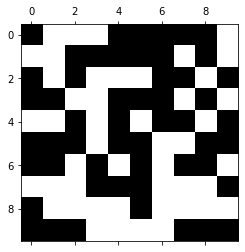

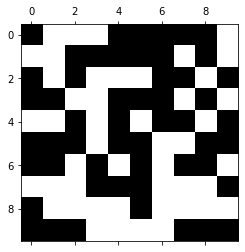

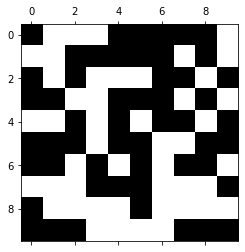

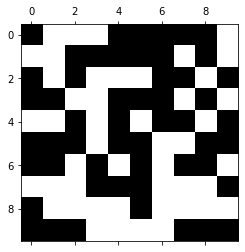

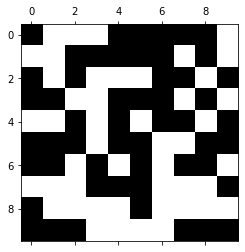

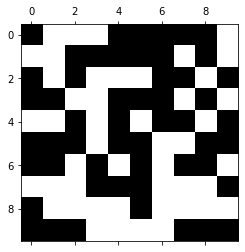

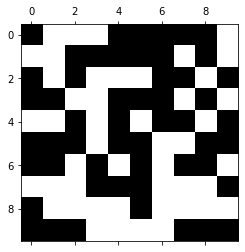

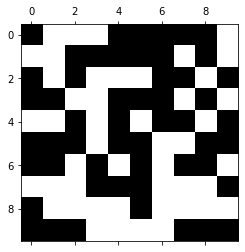

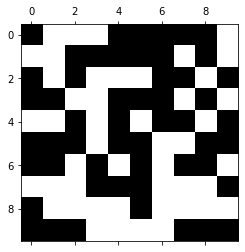

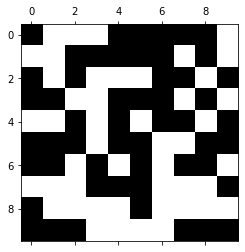

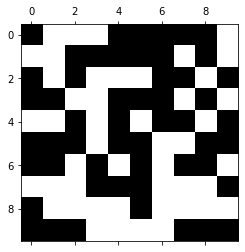

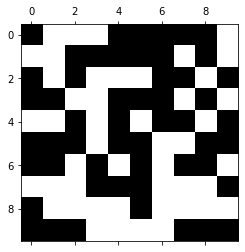

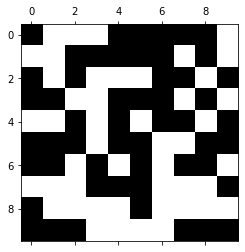

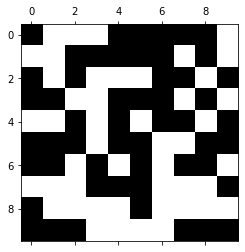

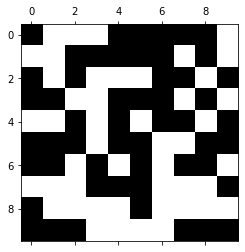

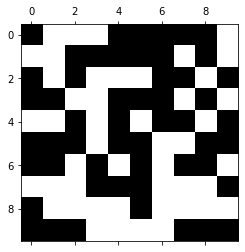

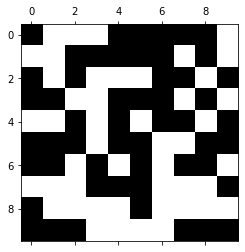

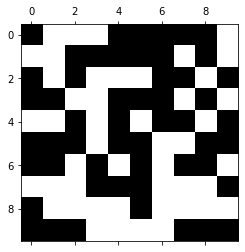

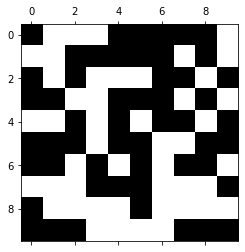

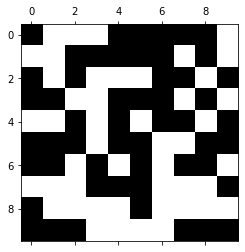

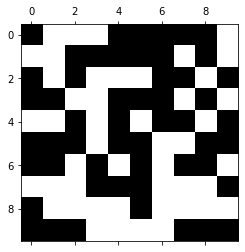

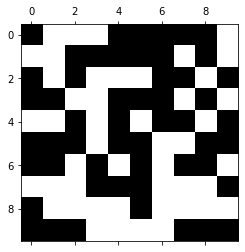

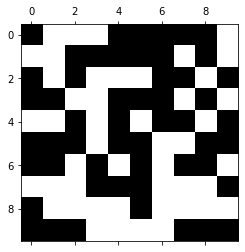

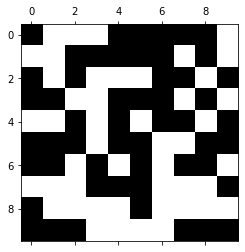

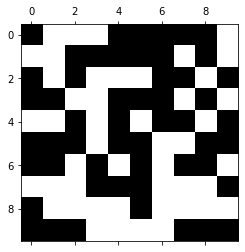

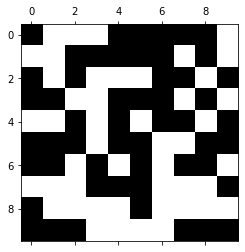

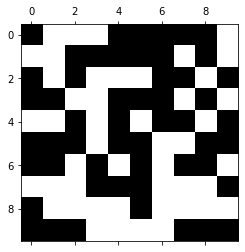

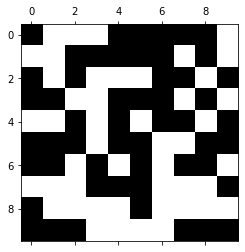

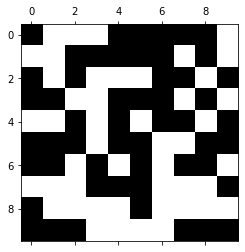

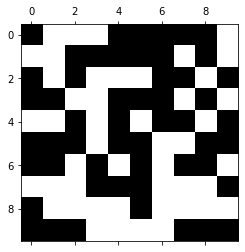

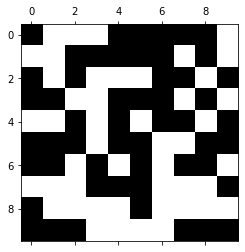

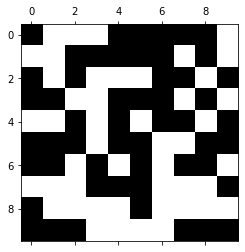

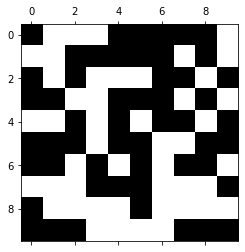

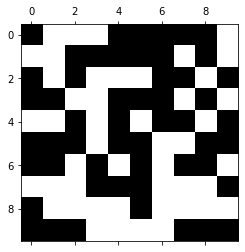

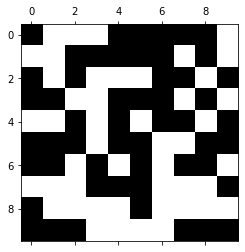

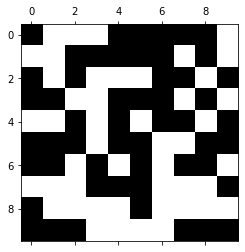

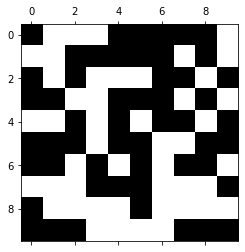

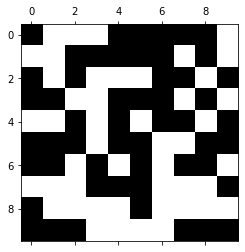

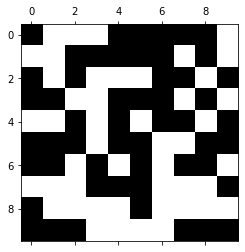

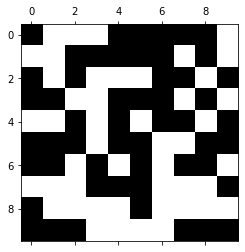

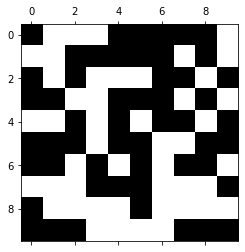

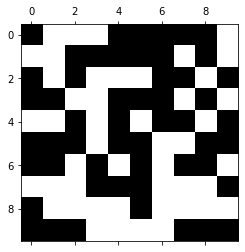

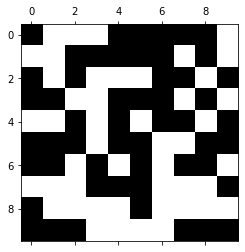

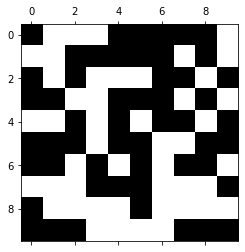

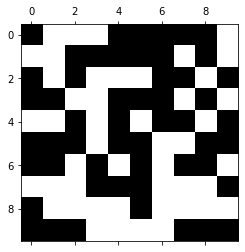

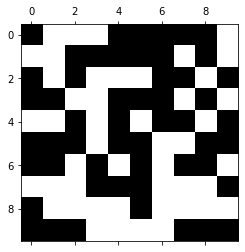

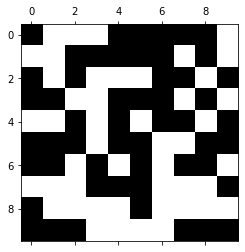

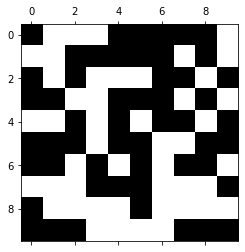

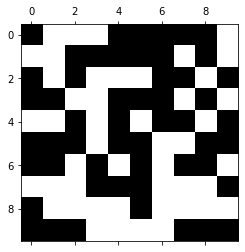

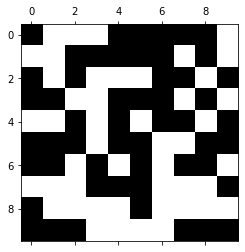

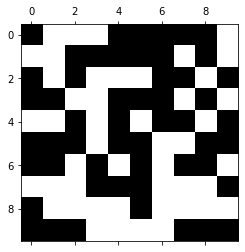

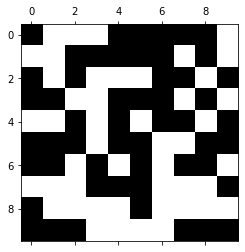

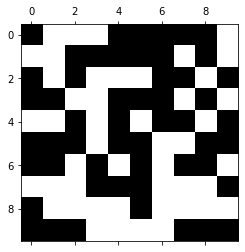

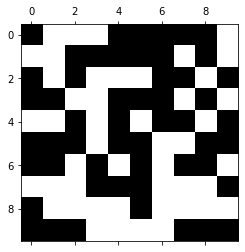

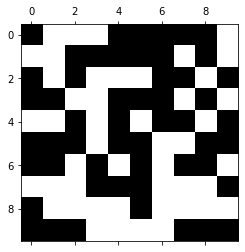

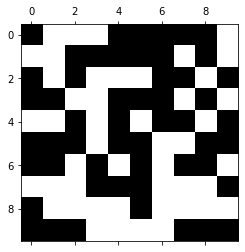

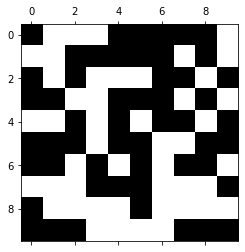

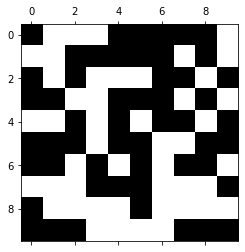

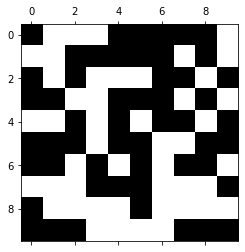

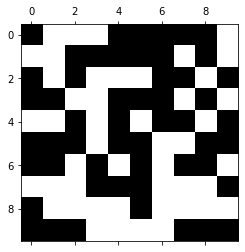

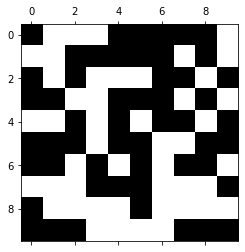

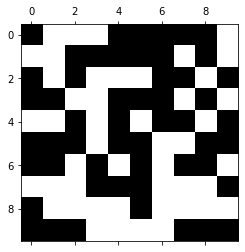

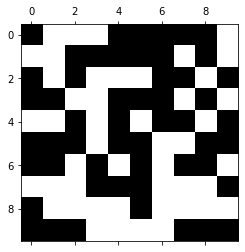

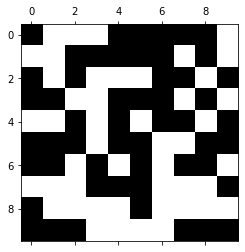

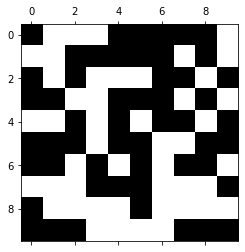

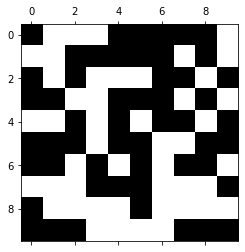

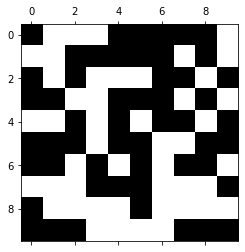

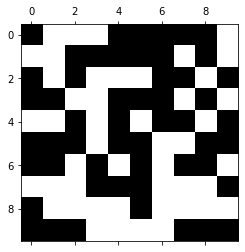

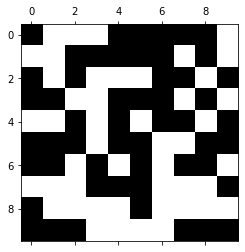

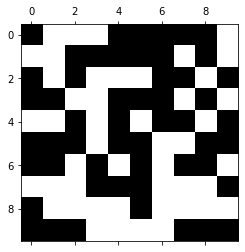

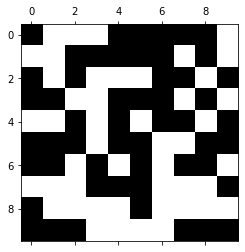

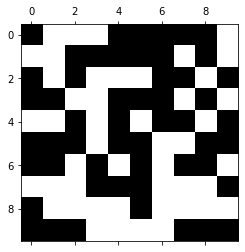

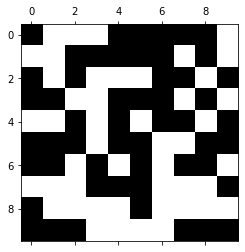

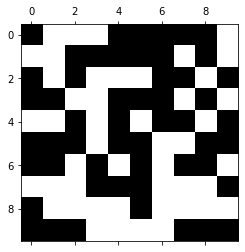

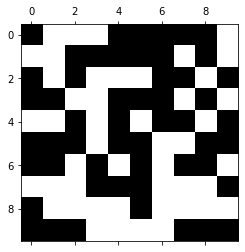

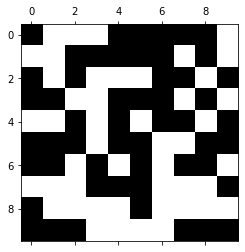

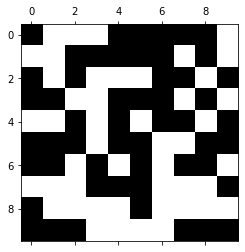

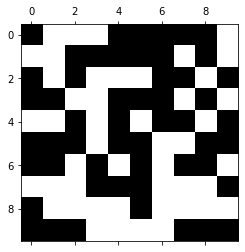

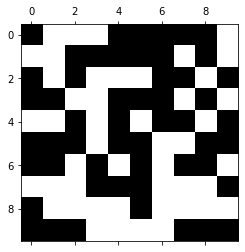

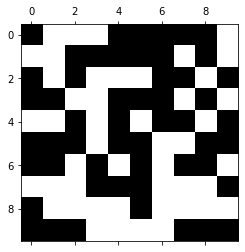

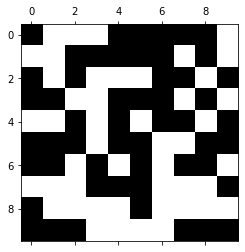

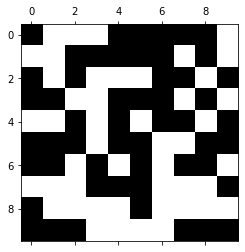

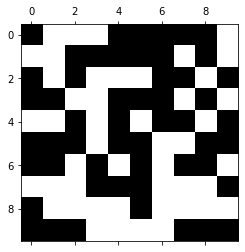

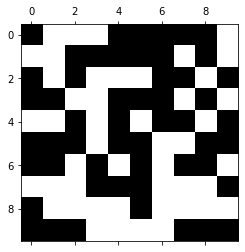

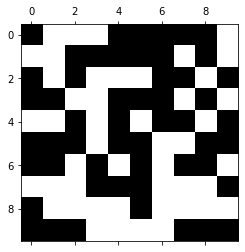

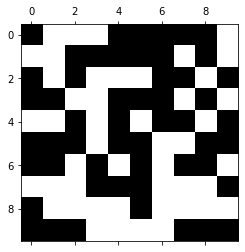

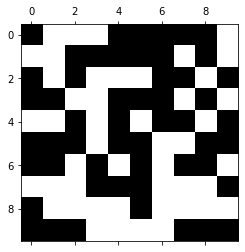

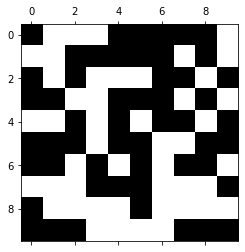

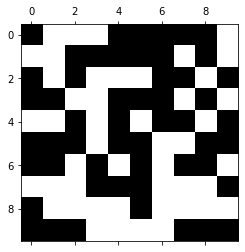

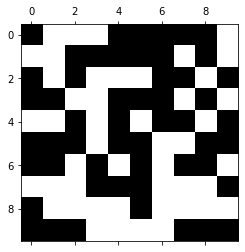

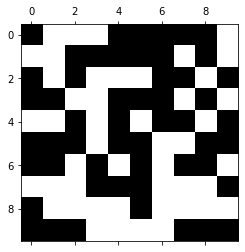

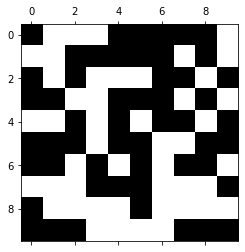

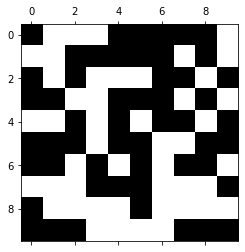

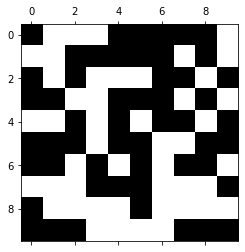

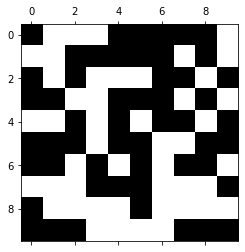

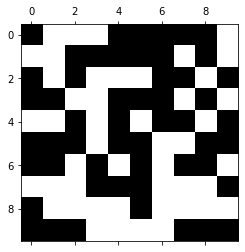

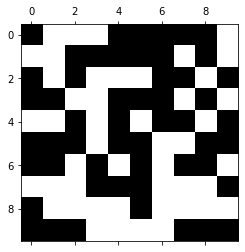

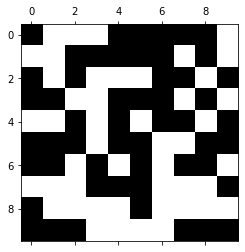

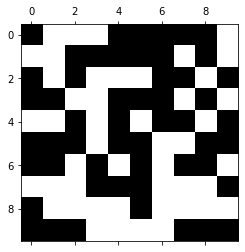

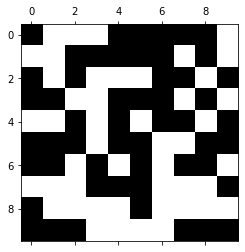

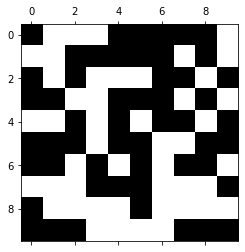

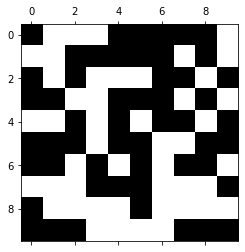

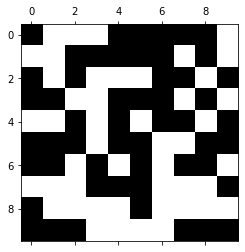

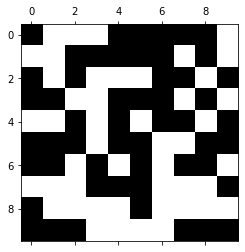

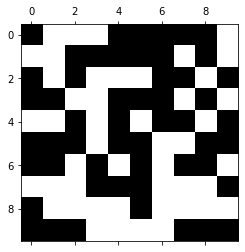

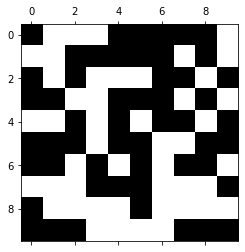

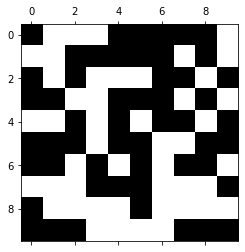

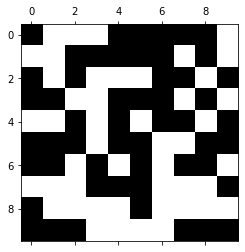

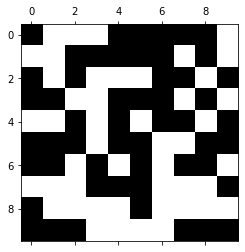

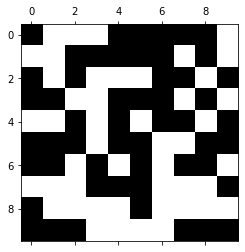

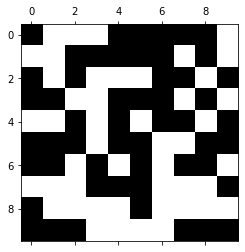

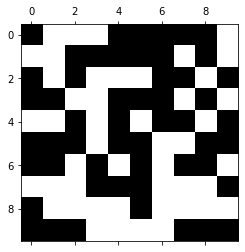

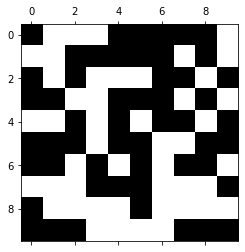

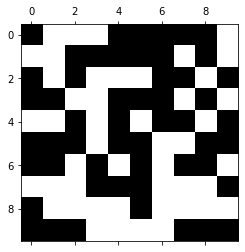

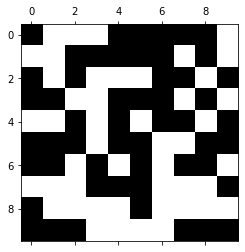

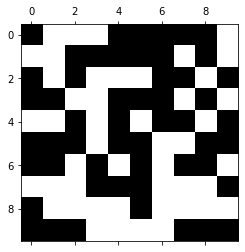

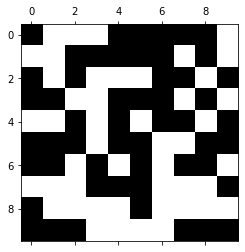

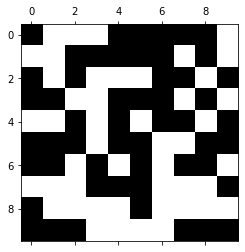

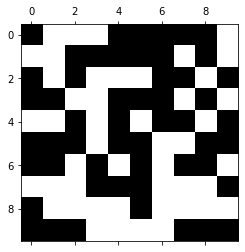

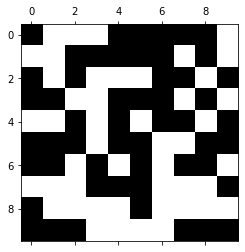

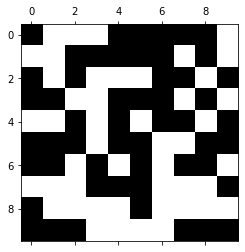

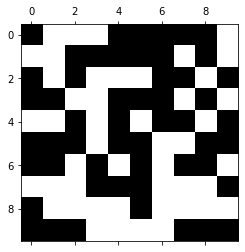

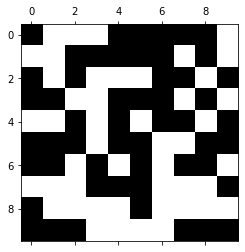

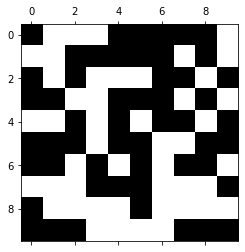

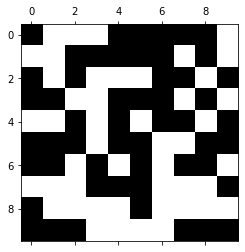

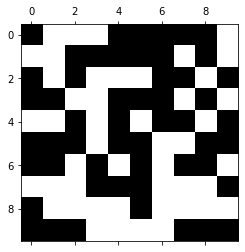

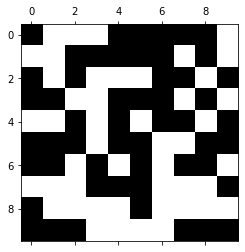

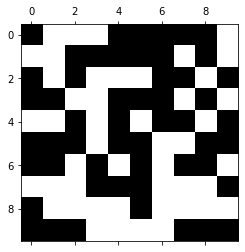

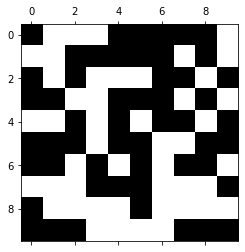

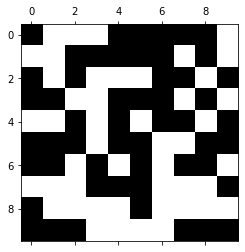

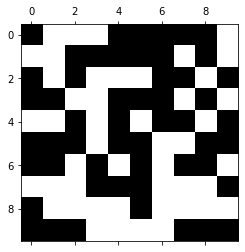

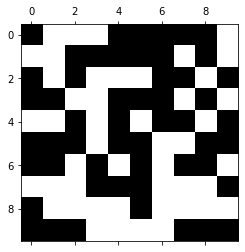

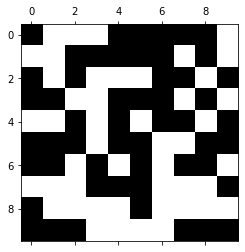

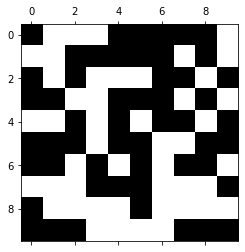

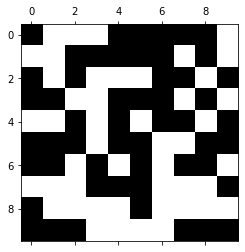

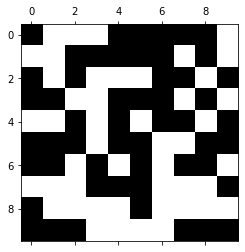

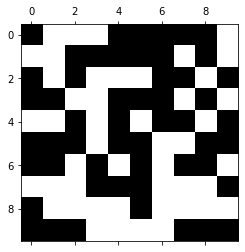

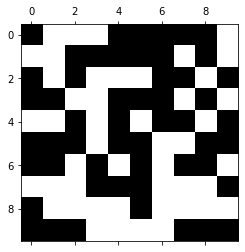

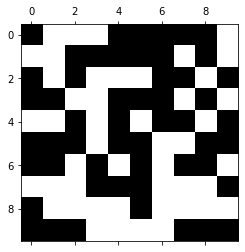

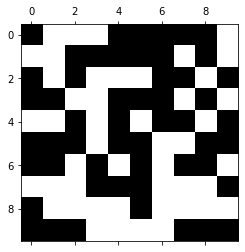

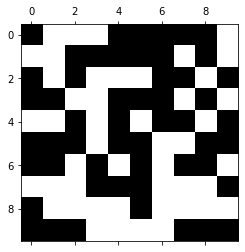

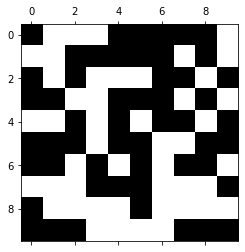

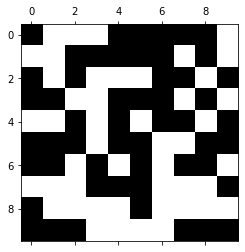

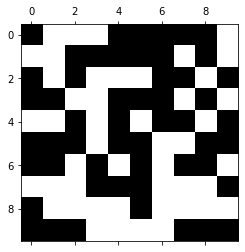

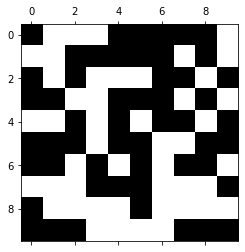

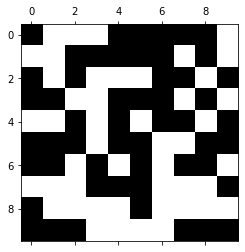

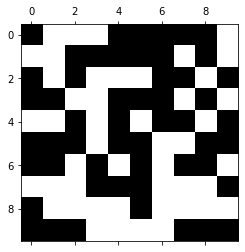

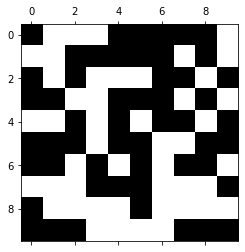

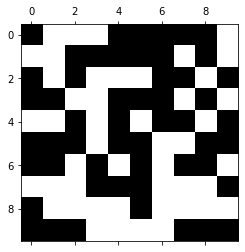

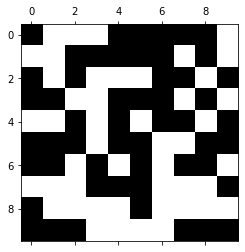

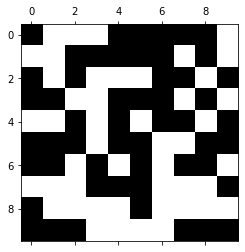

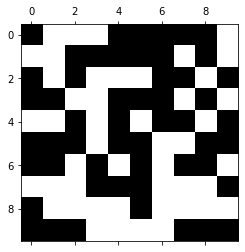

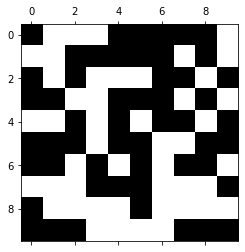

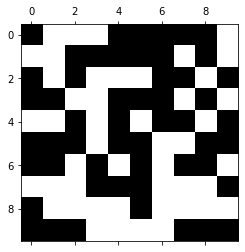

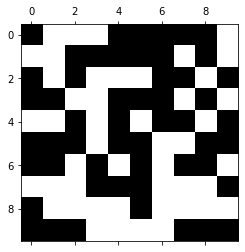

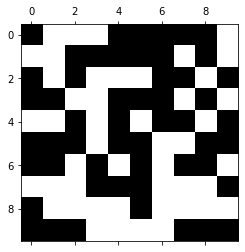

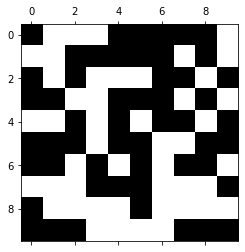

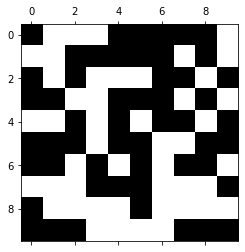

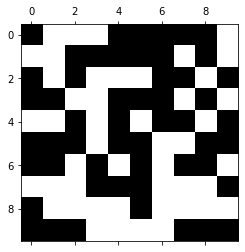

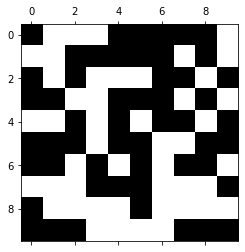

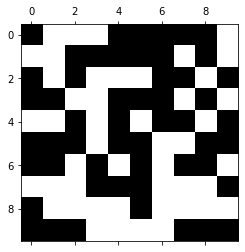

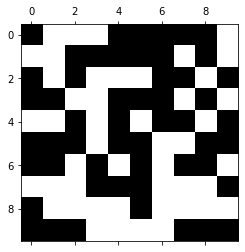

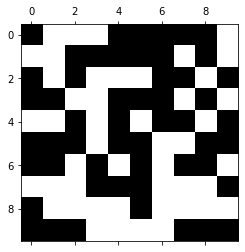

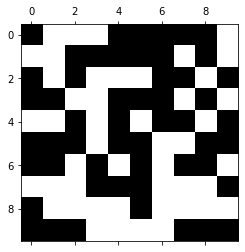

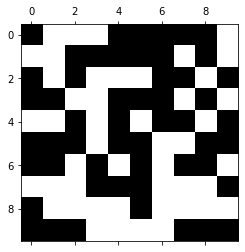

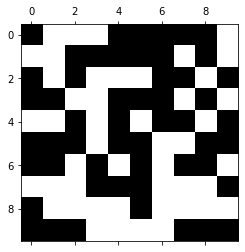

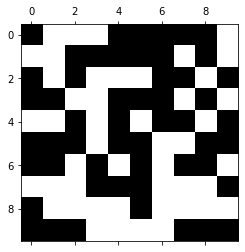

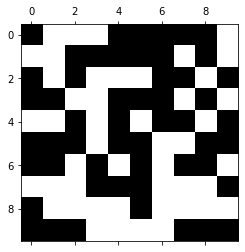

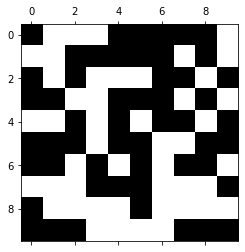

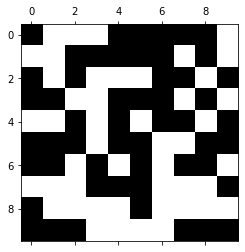

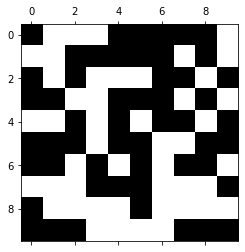

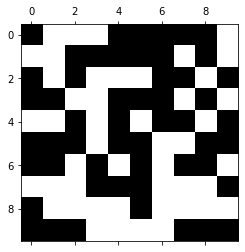

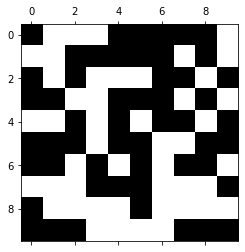

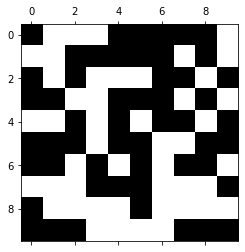

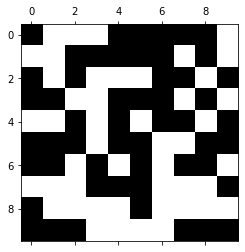

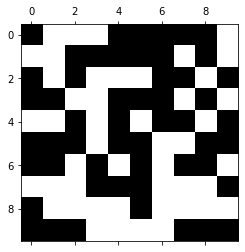

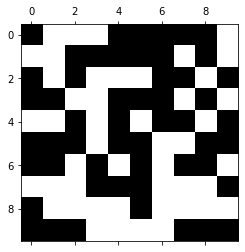

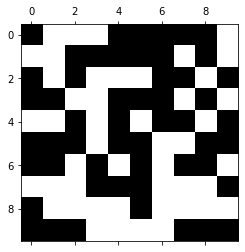

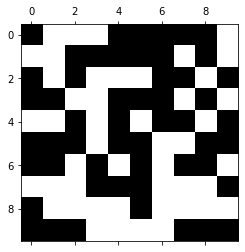

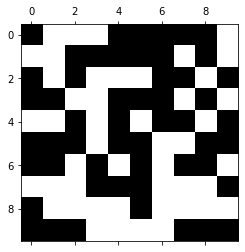

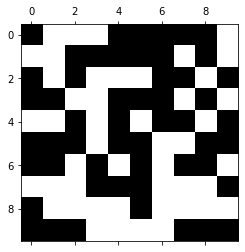

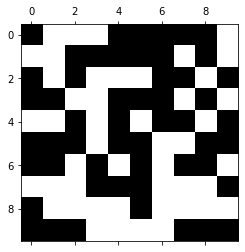

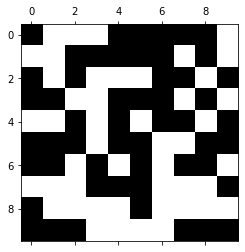

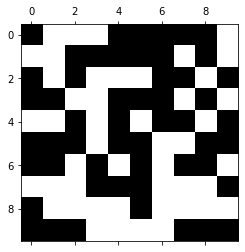

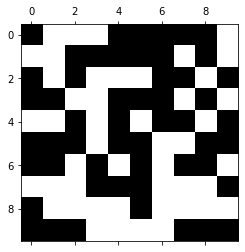

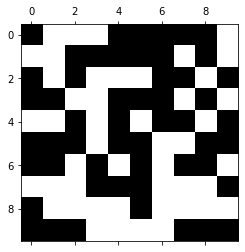

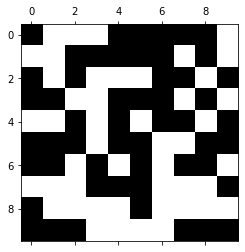

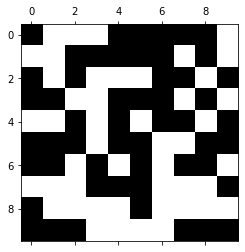

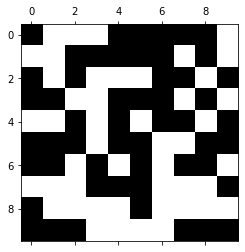

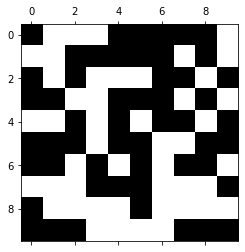

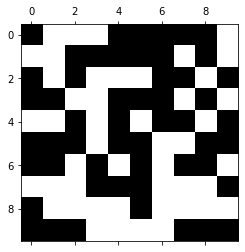

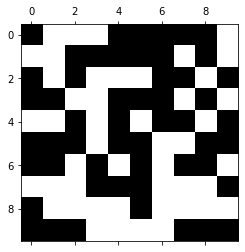

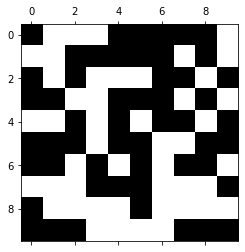

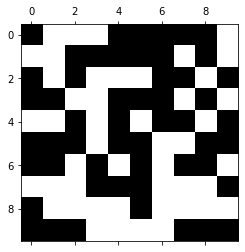

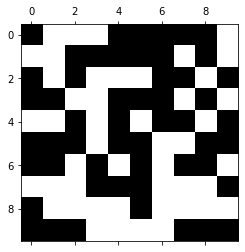

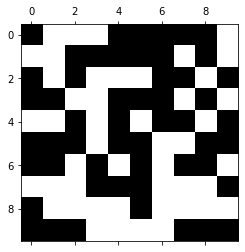

In [21]:
recovery(N,p)